# Week4 - Homework 1

### Complete _todo_ parts in the following:

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [146]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [148]:
df.head()

,X1,X2,y
0,0.000000,A,10.888577
1,0.000628,B,3.733345
2,0.001257,A,6.640960
3,0.001885,B,3.780862
4,0.002514,A,8.922646


<Axes: xlabel='X1', ylabel='y'>

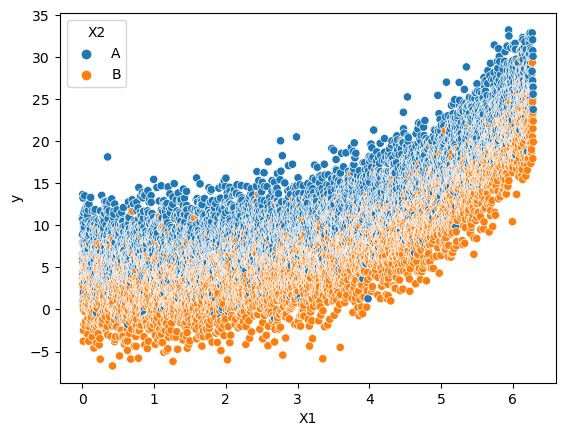

In [150]:
# Create a scatter plot
# Create a scatter plot to visualize the relationship between 'X1' and 'y' using the entire DataFrame 'df'.
# Points are colored based on the values of 'X2' to indicate how this categorical variable affects the relationship between 'X1' and 'y'.

sns.scatterplot(data=df, x='X1', y='y', hue='X2')

<Axes: xlabel='X1', ylabel='y'>

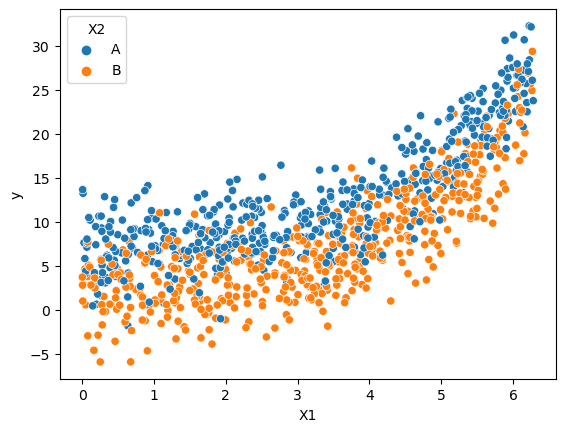

In [151]:
# Create a scatter plot
# Create a scatter plot to visualize the relationship between 'X1' and 'y' from a random sample of 1000 rows in the DataFrame 'df'.
# Points are colored based on the values of 'X2' to illustrate how this categorical variable influences the relationship.


sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')

#### Todo: 
explain findings in the graphs


Summary of Findings from the Scatter Plot
Axes Overview:

The x-axis represents the variable (X1) (ranging from (0) to (2\pi)).
The y-axis represents the variable (y), influenced by a hyperbolic cosine function and an added shift based on category.
Category Distribution:

Points are colored based on category (X2), with 'A' points having higher (y) values due to a +5 shift compared to 'B' points.
Both categories are present across the plot, but 'A' is more concentrated at higher (y) values.
Trends and Variability:

(y) values generally increase with (X1), reflecting the underlying hyperbolic cosine trend.
The scatter indicates noise, showing variability in data points.
Comparison Insights:

The upward shift of 'A' suggests a distinct group with higher average (y) values compared to 'B'.
Overlap between categories indicates some relationship or similarity.

Conclusion
The scatter plot reveals clear trends and distinctions between categories, highlighting the effects of variability and category shifts. This visualization aids in understanding relationships within the data and can inform further analysis or decision-making.

In [155]:
X = df[['X1', 'X2']]
y = df.y

In [157]:
X.head()

,X1,X2
0,0.000000,A
1,0.000628,B
2,0.001257,A
3,0.001885,B
4,0.002514,A


In [159]:
model = LinearRegression()
model.fit(X[['X1']], y)

model.score(X[['X1']], y) 

0.5770320946799415

In [161]:
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.5770320946799415

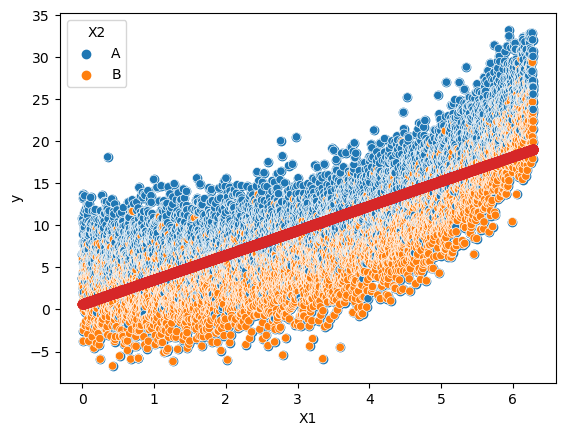

In [163]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
plt.scatter(X.X1, y) 
plt.scatter(X.X1, y_pred)

# Create a scatter plot to visualize the relationship between 'X1' and 'y' using the DataFrame 'df',
# with points colored by the categories in 'X2'. 
# Overlaid on this plot, we add a scatter plot of the predicted values (y_pred) against 'X1'
# to evaluate the model's predictions relative to the actual observations.

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)

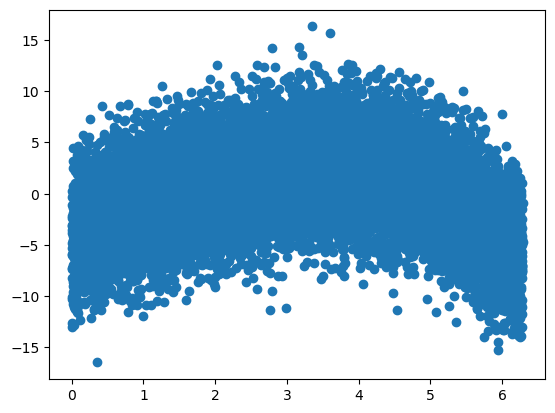

In [164]:
# Create a scatter plot to visualize the residuals (the difference between predicted values and actual values)
# where 'X.X1' represents the values of the independent variable, and 'y_pred - y' represents the error of the predictions.

plt.scatter(X.X1, y_pred-y)

<Axes: >

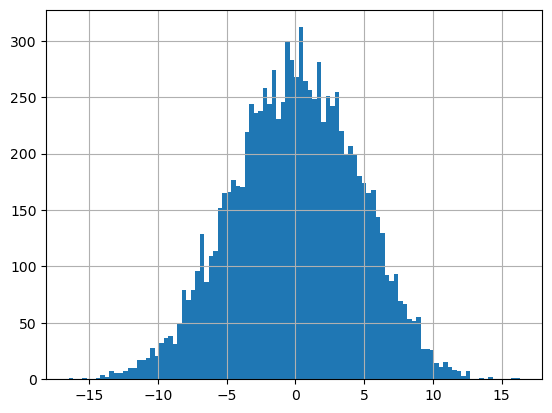

In [171]:
# Plot a histogram of the residuals (differences between predicted and actual values)
# to visualize their distribution. The histogram is divided into 100 bins for a detailed view of the residuals' behavior.

(y_pred-y).hist(bins=100)

#### Todo: 
Explain findings in the graphs above & what we can try next

Findings from the Graphs:
Scatter Plot of Actual vs. Predicted Values:

Compare actual (y) vs. predicted (y_{pred}). Close alignment suggests good model performance; discrepancies indicate potential issues.
Scatter Plot with Hue:

Visualizes how (y) varies with (X1) while color-coding by another variable (X2). Look for patterns, clusters, or interactions that may affect the relationship.
Scatter Plot of Prediction Errors:

Displays residuals (prediction errors) versus (X1). Ideally, errors should be randomly scattered around 0. Patterns may suggest model deficiencies.
Histogram of Prediction Errors:

Shows the distribution of errors. A normal distribution centered around 0 indicates good performance; skewness or distinct modes reveal biases or missed patterns in predictions.


Recommendations for Next Steps:

Feature Engineering: Explore new features and transformations to improve model fit.

Model Tuning: Experiment with different modeling techniques and hyperparameter tuning.

Data Exploration: Investigate correlations with additional features and their interaction effects on (y).

Residual Analysis: Check residuals for homoscedasticity, normality, and independence; consider robust regression if needed.

Cross-Validation: Implement cross-validation to enhance model generalization.

Error Investigation: Analyze significant prediction errors to inform improvements.

Interaction Effects: Further analyze how (X2) interacts with (X1) and (y).

This structured approach should lead to improved model performance and better understanding of your data relations.

In [173]:
# todo: explain the code below, what we do & why we do it? explained below

transform = PolynomialFeatures(degree=2)

X_data = transform.fit_transform(X[['X1']])

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.6808995354381644

Polynomial Features Transformation:

Code:transform = PolynomialFeatures(degree=2)
Initializes a transformation to create polynomial features (specifically, quadratic) from the original feature X1.
Feature Transformation:

Code: X_data = transform.fit_transform(X[['X1']])
Transforms X1 to include both X1 and its square (X1^2), allowing the model to capture non-linear relationships with the target variable y.

Model Initialization:
Code: model = LinearRegression()
Prepares a linear regression model for fitting.

Model Fitting:
Code: model.fit(X_data, y)
Trains the regression model on the transformed features and the target variable, learning the relationship between them.

Model Evaluation:
Code: model.score(X_data, y)
Calculates the ( R^2 ) score, indicating how well the model explains the variance in the target variable, with a score of approximately 0.689 suggesting that about 68.9% of the variance in ( y ) is explained by the model.


This code transforms a feature into polynomial form to allow for non-linear modeling, fits a linear regression model to the data, and evaluates its performance using the ( R^2 ) score, providing insights into how well the model captures the relationship between the features and target variable.

In [176]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6808995354381644

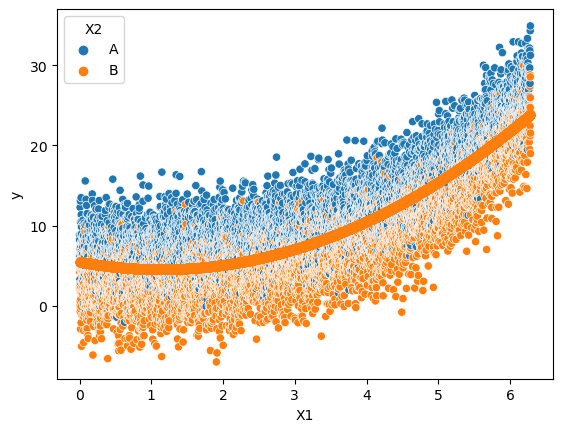

In [17]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)

# Visualize the actual target values and predicted values against the second feature (index 1) 
# in the dataset (X_data).
# Plot the actual target variable 'y' against the second feature in 'X_data' to observe 
# how the actual values are distributed.
# Overlay the predicted values 'y_pred' against the same feature to see how well the predictions 
# align with the actual values.

plt.scatter(X_data[:, 1], y)
plt.scatter(X_data[:, 1], y_pred)


# Visualize the relationship between the features and the target variable
# Create a scatter plot using Seaborn to show the actual target values 'y' against feature 'X1', 
# with points colored by the categorical variable 'X2'.

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)

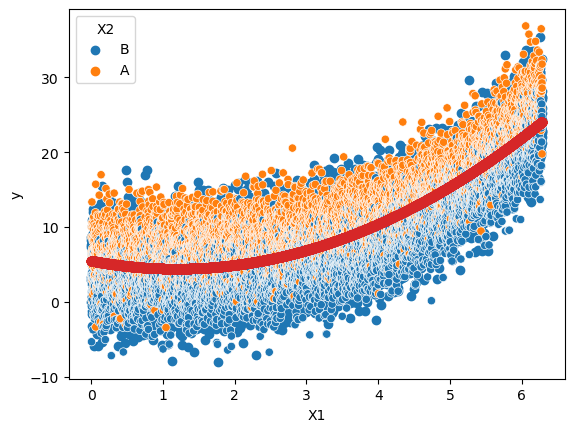

In [50]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)

# Plotting the actual vs. predicted values of the target variable against the second feature (X_data[:, 1]).
# The first scatter plot shows the true target values (y) to visualize their distribution with respect 
# to the second feature of the dataset.

plt.scatter(X_data[:, 1], y)
plt.scatter(X_data[:, 1], y_pred)

# The second scatter plot overlays the predicted values (y_pred) to assess the model's performance.
# This allows for comparison between actual and predicted values for the same feature.
# Scatter Plot of Actual vs. Predicted Values by Feature

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)

<Axes: >

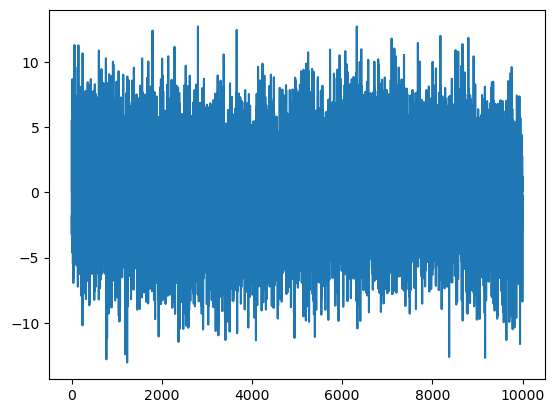

In [52]:
# Residual Plot: Visualizing the Difference Between Predicted and Actual Values

(y_pred-y).plot()

<Axes: >

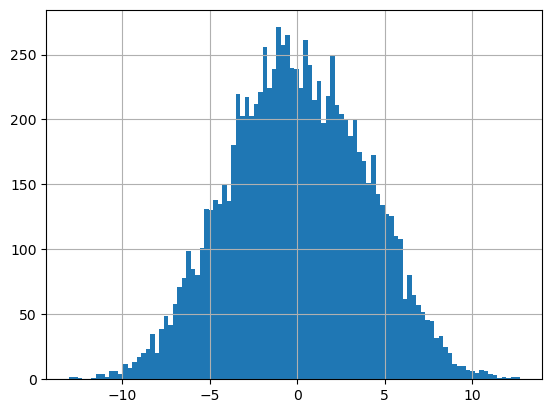

In [56]:
#Distribution of Prediction Errors with Histogram

(y_pred-y).hist(bins=100)

### Todo:
Explain findings in the above graphs & what can we do next?

Summary: Distribution of Prediction Errors with Histogram

The histogram of prediction errors (difference between `y_pred` and `y`) provides insights into the performance of a predictive model:

1. **Centering Around Zero**: 
   - An error distribution centered at zero indicates accurate predictions, while a skewed distribution suggests bias (either underestimation or overestimation).

2. **Spread of Errors**: 
   - A wide spread indicates variability in model performance, with some predictions being significantly off, while a narrow spread suggests consistency.

3. **Presence of Outliers**: 
   - Outliers may indicate specific cases where the model performs poorly and warrant further investigation.

### Next Steps:
- **Model Improvement**: Tune hyperparameters or switch algorithms to address any bias or error distribution issues.
- **Error Analysis**: Investigate outliers to understand specific weaknesses in the model.
- **Feature Engineering**: Enhance the model by creating or transforming features.
- **Ensemble Methods**: Combine multiple models to improve overall predictive performance.
- **Cross-Validation**: Ensure stability in model performance across varying subsets of data.
- **Regularization**: Apply techniques to prevent overfitting if necessary.
- **Address Imbalanced Data**: Use methods to balance classes in the data if relevant.

This approach aims to enhance model accuracy and robustness based on the insights gained from the error distribution.

##  Finally:

In [60]:
## to see the difference (leave these blocks commented when submitting)
encoder = OneHotEncoder()

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

pd.DataFrame(
     data=encoded.todense(), 
     columns=encoder.get_feature_names_out()
 ).head()

,X2_A,X2_B
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [62]:
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

In [64]:
encoded_df = pd.DataFrame(
    data=encoded.todense(), 
    columns=encoder.get_feature_names_out()
)

In [66]:
encoded_df.head()

,X2_B
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [70]:
# todo: explain the code
numerical_features = ['X1']
X_new = X[numerical_features].join(encoded_df)
X_new.head()

,X1,X2_B
0,0.000000,0.0
1,0.000628,0.0
2,0.001257,0.0
3,0.001885,0.0
4,0.002514,0.0


The provided code snippet is focused on preparing a new DataFrame, `X_new`, for analysis by integrating specific numerical features with other encoded features. It begins by defining a list called `numerical_features`, which, in this case, includes only one feature: 'X1'. The code then selects this feature from the DataFrame `X` and combines it with another DataFrame, `encoded_df`, using the `.join()` method. This step is particularly useful in machine learning and data analysis, as it allows for the inclusion of additional information derived from categorical variables that have been transformed into a numerical format, typically via one-hot encoding.

After creating `X_new`, the snippet invokes the `.head()` method to display the first five rows of the resulting DataFrame. This quick inspection is a common practice to verify that the data has been combined correctly and to understand its structure. The new DataFrame, which now comprises both the selected numerical feature and the corresponding encoded features, is ready for subsequent analysis, modeling, or further data processing, thus enhancing the comprehensiveness of the dataset used.

In [19]:
# todo: explain the code

poly = PolynomialFeatures()
X_data = poly.fit_transform(X_new)

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.8107577199835554

The provided code snippet implements polynomial regression to augment the capabilities of a linear regression model in capturing complex relationships within the dataset. It begins by creating an instance of `PolynomialFeatures` from the `sklearn.preprocessing` module. By calling the `fit_transform` method on `X_new`, it generates a new feature set that includes not only the original features but also their polynomial combinations. This transformation enriches the dataset by adding polynomial terms such as squares and interaction terms between features, thereby enabling the linear model to better capture non-linear patterns in the data. This is particularly useful when the relationship between the independent variables and the target variable is not strictly linear.

Following the feature expansion, the code initializes a `LinearRegression` model and fits it to the expanded feature set (`X_data`) and the target variable (`y`). Through this process, the model learns the optimal coefficients that map the polynomial features to the target values. Finally, the `.score()` method evaluates the model's performance by returning the \(R^2\) score, which measures the proportion of variance in the target variable that can be explained by the model. In this instance, an \(R^2\) value of approximately 0.811 suggests that the model accounts for about 81.1% of the variance in `y`, indicating a strong fit to the dataset.

In [20]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.8107577199835554

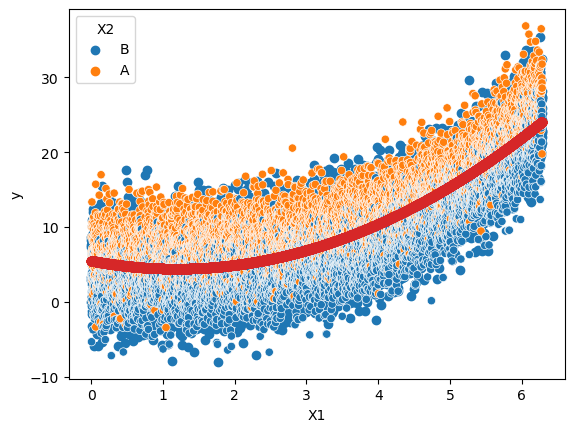

In [74]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
plt.scatter(X_new.X1, y)
plt.scatter(X_new.X1, y_pred)

# Create a scatter plot of the actual data using Seaborn, showing the relationship between feature 'X1' and target variable 'y', 
# while coloring the points based on the values of feature 'X2' to differentiate categories. 
# Overlay the predicted values ('y_pred') against 'X1' using Matplotlib's scatter plot for comparison.

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X_new.X1, y_pred)

<Axes: >

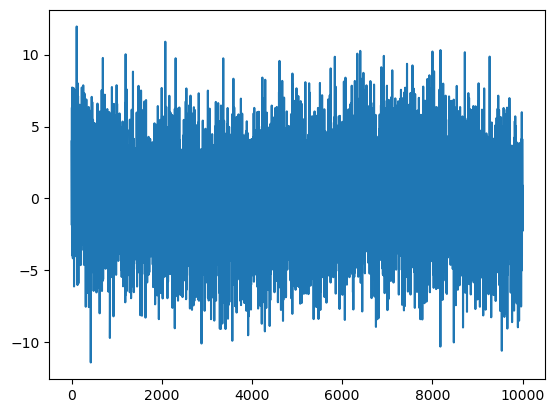

In [21]:
# Plot the prediction errors (residuals) to analyze the difference between predicted values and actual values.

(y_pred-y).plot()

<Axes: >

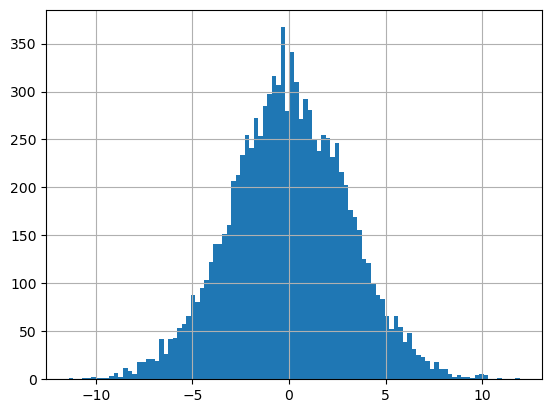

In [22]:
# Plotting a histogram of the prediction errors (residuals) to visualize their distribution.
# A well-distributed histogram around zero suggests that the model's predictions are unbiased.
# It helps identify issues such as skewness or the presence of outliers in the prediction errors.

(y_pred-y).hist(bins=100)

#### Todo: explain results
When analyzing the histogram of prediction errors (residuals), we seek to understand how well our model predicts the target values. A histogram that resembles a normal distribution, centered around zero, indicates that the model has an unbiased prediction with errors symmetrically distributed; this is a sign of effective modeling. Conversely, if the distribution is skewed to the left or right, it suggests that the model systematically underestimates or overestimates the target variable, respectively. Additionally, the spread of the residuals can provide insights into prediction accuracy: a narrow spread signifies that errors are generally small and the model performs well, while a wide spread signifies larger errors, suggesting issues in model fitting or generalization.

Further, it is important to observe the presence of outliers and assess whether heteroscedasticity is at play. Outliers can manifest as spikes or long tails in the histogram and can significantly distort the model's performance. Heteroscedasticity, characterized by varying error variance across predicted values, may violate the assumptions of certain regression models and warrant model adjustments. Overall, interpreting the histogram of prediction errors helps diagnose the effectiveness of the model and indicates potential areas for refinement or the need for alternative modeling strategies.

## Create a train-test split

In [115]:
X_training, X_test, y_training, y_test = train_test_split(X, y)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 7,500
Test samples: 2,500


 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set. 
 * Get the r2_score on the test set.
 
 Important note: When transforming use `fit_transform` on the training set and use `transform` on the test set.
 
 __eg:__
 
 `encoded_training = encoder.fit_transform(X_train[categorical_features])`
 
 `encoded_testing = encoder.transform(X_test[categorical_features])`
     


X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

# Identify categorical features for encoding
categorical_features = X_training.select_dtypes(include=['object']).columns.tolist()

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit the encoder on the training data and transform it
encoded_training = encoder.fit_transform(X_training[categorical_features])

# Transform the test data
encoded_testing = encoder.transform(X_test[categorical_features])

# Retrieve the corresponding feature columns after encoding
encoded_training_df = pd.DataFrame(encoded_training, columns=encoder.get_feature_names_out(categorical_features))
encoded_testing_df = pd.DataFrame(encoded_testing, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical features from training and test sets
X_training = X_training.drop(categorical_features, axis=1)
X_test = X_test.drop(categorical_features, axis=1)

# Combine encoded features back with the numerical features
X_training = pd.concat([X_training.reset_index(drop=True), encoded_training_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), encoded_testing_df.reset_index(drop=True)], axis=1)

# Train the linear regression model
model = LinearRegression()
model.fit(X_training, y_training)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the R² score
r2 = r2_score(y_test, y_pred)
print(f'R² score on the test set: {r2:.4f}')

In [117]:
X_training.head()

,X1,X2
8382,5.267093,B
2541,1.596717,A
8191,5.147072,A
9192,5.776082,A
5543,3.483118,B


In [119]:
# code
X_training2 = X_training.copy()

X_training2['isB'] = [ 1 if x == 'B' else 0  for x in X_training['X2']]
X_training2.drop('X2', axis = 1, inplace=True)
X_training2.head()

encoder= OneHotEncoder(drop='first')
X_trainingEncoded = encoder.fit_transform(X_training[['X2']])


X_training2 = pd.DataFrame({
    'X1': X_training.X1,
    'X2': X_trainingEncoded.toarray()[:, 0]
})
X_training2.head()


,X1,X2
8382,5.267093,1.0
2541,1.596717,0.0
8191,5.147072,0.0
9192,5.776082,0.0
5543,3.483118,1.0


In [121]:
m = LinearRegression().fit(X_training2, y_training)

X_testEncoded = encoder.transform(X_test[['X2']])
X_test2 = pd.DataFrame({
    'X1': X_test.X1,
    'X2': X_testEncoded.toarray()[:, 0]
})
m.score(X_test2, y_test)

0.706973932667299

## Create a pipeline

Add comments to `todo` parts

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

cat_vars = ['X2']
num_vars = ['X1']

# todo
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# todo
cat_pipeline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# todo
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])

print(modeling_pipeline)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Example variable lists (adjust these according to your actual features)
cat_vars = ['X2']  # Categorical variables
num_vars = ['X1']  # Numerical variables

# TODO: Create a numerical pipeline with polynomial features
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2)),  # Generates polynomial and interaction features
    # You can add more preprocessing steps here if necessary (e.g., StandardScaler)
])

# TODO: Create a categorical pipeline with one-hot encoding
cat_pipeline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))  # Handling categorical features
])

# TODO: Combine the numerical and categorical pipelines into a single processing pipeline
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),  # Apply numerical transformations
    ('cat pipeline', cat_pipeline, cat_vars)    # Apply categorical transformations
])

# Create a complete modeling pipeline that includes data preprocessing followed by the regression model
modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),  # Apply the data processing steps
    ('lm', LinearRegression())                  # Add the Linear Regression model
])

# Display the model pipeline structure
print(modeling_pipeline)

# Assuming you have your data prepared (X, y)
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
modeling_pipeline.fit(X_training, y_training)

# Predict on the test set
y_pred = modeling_pipeline.predict(X_test)

# Calculate and print the R² score
r2 = r2_score(y_test, y_pred)
print(f'R² score on the test set: {r2:.4f}')

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])
R² score on the test set: 0.8086


In [129]:
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [36]:
modeling_pipeline.score(X_test, y_test)

0.8129844742442158

## Evaluate/create residual plots

In [37]:
y_pred = modeling_pipeline.predict(X_test)

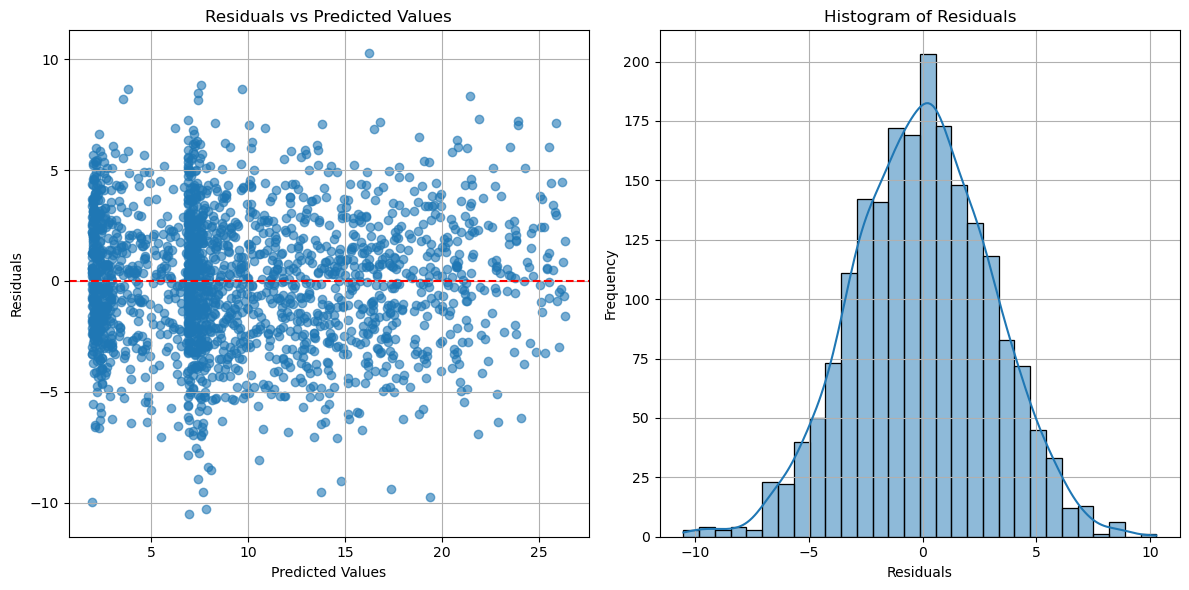

In [131]:
# code

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# After obtaining predictions from the modeling pipeline
y_pred = modeling_pipeline.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Create a DataFrame to hold the actual, predicted, and residual values for easier plotting
residuals_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residuals': residuals
})

# Plotting the residuals
plt.figure(figsize=(12, 6))

# Residuals vs Predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()

## Explain findings

Explain findings

Creating residual plots after making predictions with your regression model:

### Summary of Code Explanation for Residual Plots:

1. **Calculate Residuals**:
   - Residuals are computed as the difference between actual (`y_test`) and predicted (`y_pred`) values: `residuals = y_test - y_pred`.

2. **Create DataFrame**:
   - A DataFrame (`residuals_df`) is created to store the actual values, predicted values, and residuals for easier visualization.

3. **Residuals vs. Predicted Values Plot**:
   - A scatter plot is generated with predicted values on the x-axis and residuals on the y-axis to check for patterns. Residuals should ideally be randomly distributed around zero.
   - A red dashed line at `y=0` indicates the zero residual line.

4. **Histogram of Residuals**:
   - A histogram with a kernel density estimate (KDE) overlay shows the distribution of residuals. The goal is for this distribution to resemble a normal distribution centered around zero, supporting the normality assumption for linear regression.

5. **Points to Evaluate**:
   - Check for randomness in the residuals plot, avoid patterns, and ensure constant variance (homoscedasticity).
   - The histogram should indicate normality for the residuals.

This process provides visual insights into the performance and suitability of your regression model.